In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 153M/163M [00:01<00:00, 75.3MB/s]
100% 163M/163M [00:01<00:00, 89.9MB/s]


In [4]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

done


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import cv2 #for image processing
from google.colab.patches import cv2_imshow #creates new window and displays the image in that video
from PIL import Image #image processing
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files=os.listdir('/content/data/with_mask')  #images of masked face
without_mask_files=os.listdir('/content/data/without_mask')  #images of unmasked face

In [7]:
print(type(with_mask_files))
print(with_mask_files[0:5])
print(without_mask_files[0:5])


<class 'list'>
['with_mask_1399.jpg', 'with_mask_519.jpg', 'with_mask_3127.jpg', 'with_mask_1047.jpg', 'with_mask_3571.jpg']
['without_mask_3577.jpg', 'without_mask_3014.jpg', 'without_mask_1572.jpg', 'without_mask_3119.jpg', 'without_mask_2051.jpg']


In [8]:
#printing no. of images
print('No. of masked images', len(with_mask_files))
print('No. of unmasked images', len(without_mask_files) )

No. of masked images 3725
No. of unmasked images 3828


### **Creating labels for the two class of images**

 with mask --> 1
 without mask --> 0

In [9]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [10]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# **Displaying the Images**

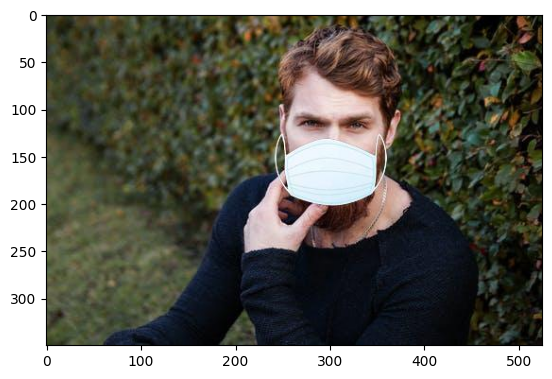

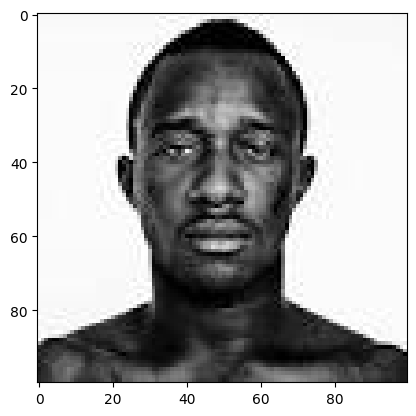

In [11]:
#displaying with mask img
img=mpimg.imread('/content/data/with_mask/with_mask_1.jpg')
imgplot=plt.imshow(img)
plt.show()
#displaying without mask img
img=mpimg.imread('/content/data/without_mask/without_mask_1.jpg')
imgplot=plt.imshow(img)
plt.show()

# **Image Processing**

1. Resize images
2. Convert the images to numpy arrays

In [12]:
#convert images to numpy arrays
data=[]
with_mask_path='/content/data/with_mask/'
without_mask_path='/content/data/without_mask/'

# For with mask images
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file) #/content/data/with_mask/with_mask_2448.jpg
  image=image.resize((128,128))  # resizing image
  image=image.convert('RGB') #converting to RGB
  image=np.array(image) #converting to numpy array
  if image.shape==(128,128,3):
    data.append(image)

# For without mask images
for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file) #/content/data/with_mask/with_mask_2448.jpg
  image=image.resize((128,128))  # resizing image
  image=image.convert('RGB') #converting to RGB
  image=np.array(image) #converting to numpy array
  if image.shape==(128,128,3):
    data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
print(type(data))
print(len(data))
print(data[0].shape)
print(data[0])
print(type(data[0]))


<class 'list'>
7553
(128, 128, 3)
[[[ 58  62  63]
  [ 54  58  59]
  [ 50  52  52]
  ...
  [ 73  65  52]
  [ 69  61  48]
  [ 74  66  53]]

 [[ 54  58  59]
  [ 51  55  56]
  [ 45  49  47]
  ...
  [ 74  66  53]
  [ 71  63  50]
  [ 77  69  56]]

 [[ 49  53  54]
  [ 45  49  50]
  [ 41  43  43]
  ...
  [ 76  69  56]
  [ 76  68  55]
  [ 82  74  61]]

 ...

 [[ 20  22  19]
  [ 21  23  20]
  [ 21  21  19]
  ...
  [171 131  82]
  [165 124  79]
  [154 113  68]]

 [[ 21  23  20]
  [ 22  24  21]
  [ 20  22  19]
  ...
  [165 124  78]
  [160 119  75]
  [154 113  69]]

 [[ 20  22  19]
  [ 21  23  20]
  [ 20  22  19]
  ...
  [166 125  79]
  [161 120  76]
  [152 111  67]]]
<class 'numpy.ndarray'>


In [14]:
# convert image list and label list to numpy arrays

X=np.array(data)
Y=np.array(labels)

In [15]:
print(X)

[[[[ 58  62  63]
   [ 54  58  59]
   [ 50  52  52]
   ...
   [ 73  65  52]
   [ 69  61  48]
   [ 74  66  53]]

  [[ 54  58  59]
   [ 51  55  56]
   [ 45  49  47]
   ...
   [ 74  66  53]
   [ 71  63  50]
   [ 77  69  56]]

  [[ 49  53  54]
   [ 45  49  50]
   [ 41  43  43]
   ...
   [ 76  69  56]
   [ 76  68  55]
   [ 82  74  61]]

  ...

  [[ 20  22  19]
   [ 21  23  20]
   [ 21  21  19]
   ...
   [171 131  82]
   [165 124  79]
   [154 113  68]]

  [[ 21  23  20]
   [ 22  24  21]
   [ 20  22  19]
   ...
   [165 124  78]
   [160 119  75]
   [154 113  69]]

  [[ 20  22  19]
   [ 21  23  20]
   [ 20  22  19]
   ...
   [166 125  79]
   [161 120  76]
   [152 111  67]]]


 [[[  3   2  34]
   [  4   3  35]
   [  4   3  34]
   ...
   [  3   0  31]
   [  3   0  32]
   [  3   0  32]]

  [[  2   1  32]
   [  2   1  32]
   [  3   2  33]
   ...
   [  3   0  31]
   [  4   1  32]
   [  4   1  32]]

  [[  3   2  32]
   [  3   2  32]
   [  3   3  32]
   ...
   [  3   0  30]
   [  3   2  32]
   [  4   2

In [16]:
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7553, 128, 128, 3)
(7553,)


# **Train-Test Split**

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [18]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7553, 128, 128, 3)
(7553,)
(6042, 128, 128, 3)
(6042,)
(1511, 128, 128, 3)
(1511,)


In [19]:
# Scaling data
X_train=X_train/255
X_test=X_test/255

In [20]:

print(X_train[0])

[[[0.84705882 0.84705882 0.84705882]
  [0.84705882 0.84705882 0.84705882]
  [0.84705882 0.84705882 0.84705882]
  ...
  [0.67058824 0.67843137 0.63921569]
  [0.67843137 0.69411765 0.66666667]
  [0.69803922 0.7254902  0.69411765]]

 [[0.84705882 0.84705882 0.84705882]
  [0.84705882 0.84705882 0.84705882]
  [0.84705882 0.84705882 0.84705882]
  ...
  [0.6745098  0.67843137 0.64313725]
  [0.67843137 0.69411765 0.66666667]
  [0.69803922 0.7254902  0.69411765]]

 [[0.85098039 0.85098039 0.85098039]
  [0.85098039 0.85098039 0.85098039]
  [0.85098039 0.85098039 0.85098039]
  ...
  [0.6745098  0.68235294 0.64313725]
  [0.67843137 0.69411765 0.66666667]
  [0.69803922 0.7254902  0.69411765]]

 ...

 [[0.74117647 0.74901961 0.70588235]
  [0.74509804 0.75294118 0.70980392]
  [0.74901961 0.75294118 0.71372549]
  ...
  [0.6745098  0.65882353 0.67058824]
  [0.66666667 0.65490196 0.66666667]
  [0.65882353 0.65490196 0.6745098 ]]

 [[0.72941176 0.7372549  0.69411765]
  [0.73333333 0.74117647 0.69803922]


# **Building a Convolution Nueral Network (CNN)**


In [30]:
  import tensorflow as tf
  from tensorflow import keras
  from keras.models import Sequential
  from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
  from tensorflow.keras.callbacks import EarlyStopping
  from tensorflow.keras.regularizers import l2



In [31]:
num_of_classes=2

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128  ,activation='relu'))
model.add(Dropout(0.5) )

model.add(Dense(64  ,activation='relu'))
model.add(Dropout(0.5) )
model.add(Dense(num_of_classes,activation='sigmoid'))


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
# training the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history=model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test),validation_split=0.2)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.6655 - loss: 0.8166 - val_accuracy: 0.8769 - val_loss: 0.2994
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8729 - loss: 0.3146 - val_accuracy: 0.8855 - val_loss: 0.2998
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8920 - loss: 0.2562 - val_accuracy: 0.8795 - val_loss: 0.2999
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8949 - loss: 0.2621 - val_accuracy: 0.8915 - val_loss: 0.2637
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9217 - loss: 0.2088 - val_accuracy: 0.9093 - val_loss: 0.2272
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9362 - loss: 0.1826 - val_accuracy: 0.9193 - val_loss: 0.2161
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9428 - loss: 0.1602 - val_accuracy: 0.9219 - val_loss: 0.1964
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9556 - loss: 0.1177 - val_acc

# **Model Evaluation**

In [34]:
training_accuracy = history.history['accuracy']
print("Training Accuracy per Epoch:", training_accuracy)

Training Accuracy per Epoch: [0.7744124531745911, 0.8742138147354126, 0.89093017578125, 0.900364100933075, 0.9255213737487793, 0.9379344582557678, 0.9415756464004517, 0.9513406157493591, 0.9606090784072876, 0.9715325832366943]


In [35]:
loss,accuracy=model.evaluate(X_test,Y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9284 - loss: 0.2744
Test Accuracy = 0.9285241365432739


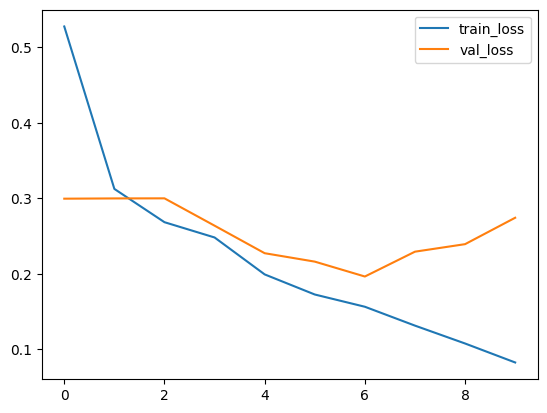

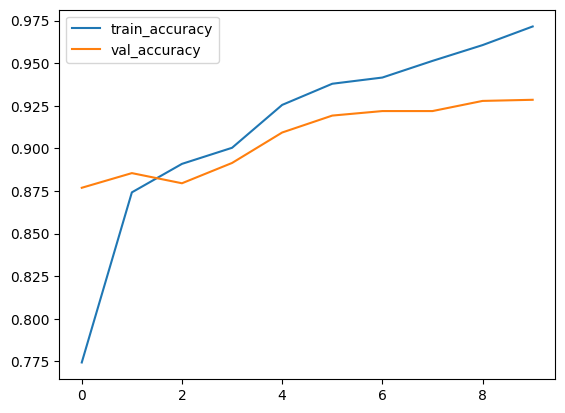

In [37]:
h=history
# plotting the loss value
plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

#plotting the accuracy value
plt.plot(h.history['accuracy'],label='train_accuracy')
plt.plot(h.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


# **Predictive System**

Path of the image to be tested:/content/with_mask.jpeg


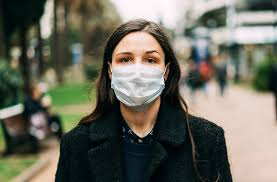

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
[[0.28849173 0.45157164]]
1
The person in the image is wearing a mask


In [38]:
input_image_path=input('Path of the image to be tested:')

input_image= cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

prediction=model.predict(input_image_reshaped)
print(prediction)


input_image_label=np.argmax(prediction)
print(input_image_label)

if input_image_label==1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')